# More data

This file will focus on how we get the data Lukas need for the scatterplot visualization.
This being 

In [37]:
# First get information about 'Driver', 'LapNumber', 'LapTime', 'IsPitStop', 'TireCompound'

import fastf1 as ff1


# Load the 2018 Australian Grand Prix Race session
race = ff1.get_session(2018, 'Australian Grand Prix', 'R')  # 'R' stands for Race
race.load()

# Extract the data for each driver's lap
laps = race.laps

# Select the data you are interested in
data = laps[['Driver', 'LapNumber', 'LapTime', 'IsPersonalBest', 'PitOutTime', 'PitInTime', 'Compound']]

# Add derived columns
data['IsPitStop'] = data['PitInTime'].notnull()  # Binary indicator for pit stop

# Clean up and rename columns for clarity
data_cleaned = data[['Driver', 'LapNumber', 'LapTime', 'IsPitStop', 'Compound']]
data_cleaned.columns = ['Driver', 'LapNumber', 'LapTime', 'IsPitStop', 'TireCompound']

# Display the cleaned data
print(data_cleaned)


core           INFO 	Loading data for Australian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
core        WARNING 	Car position data is unavailable!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '7', '3', '14', '33', '27', '77', '2', '55

    Driver  LapNumber                LapTime  IsPitStop TireCompound
0      GAS        1.0 0 days 00:01:45.060000      False          nan
1      GAS        2.0 0 days 00:01:33.372000      False    ULTRASOFT
2      GAS        3.0 0 days 00:01:32.861000      False    ULTRASOFT
3      GAS        4.0 0 days 00:01:32.184000      False    ULTRASOFT
4      GAS        5.0 0 days 00:01:32.332000      False    ULTRASOFT
..     ...        ...                    ...        ...          ...
935    ERI        2.0 0 days 00:01:33.177000      False    SUPERSOFT
936    ERI        3.0 0 days 00:01:32.746000      False    SUPERSOFT
937    ERI        4.0 0 days 00:01:32.210000      False    SUPERSOFT
938    ERI        5.0 0 days 00:01:32.289000      False    SUPERSOFT
939    ERI        6.0                    NaT       True    SUPERSOFT

[940 rows x 5 columns]


C:\Users\Pc\AppData\Local\Temp\ipykernel_8264\2145358225.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsPitStop'] = data['PitInTime'].notnull()  # Binary indicator for pit stop


In [38]:
# Then get weather data
race = ff1.get_session(2018, 'Australian Grand Prix', 'R')  # 'R' stands for Race
race.load()

# Extract the data for each driver's lap

# Access the weather data, which contains the outside temperature and rainfall
weather_data = race.weather_data

core           INFO 	Loading data for Australian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
core        WARNING 	Car position data is unavailable!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '7', '3', '14', '33', '27', '77', '2', '55

In [39]:
# We see that there is more than one observation for some laps.
weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5
...,...,...,...,...,...,...,...,...
106,0 days 01:46:58.510000,24.3,30.4,997.2,True,32.7,311,3.7
107,0 days 01:47:58.588000,24.3,30.9,997.2,True,32.6,278,4.2
108,0 days 01:48:58.779000,24.3,30.9,997.2,True,32.6,278,4.2
109,0 days 01:49:58.545000,24.3,30.9,997.2,True,32.6,278,4.2


In [40]:
# Make a function to indicate which laps has what weather.

import pandas as pd

# Extract Vettel's lap data
vettel_laps = data_cleaned[data_cleaned['Driver'] == 'VET'].copy()

# Convert lap times (timedelta format) to total seconds for easier calculations
vettel_laps['LapTimeSeconds'] = vettel_laps['LapTime'].dt.total_seconds()

# Compute the cumulative lap time for each of Vettel's laps
vettel_laps['CumulativeLapTime'] = vettel_laps['LapTimeSeconds'].cumsum()

# Now we need to associate the weather data with Vettel's lap times
# First, convert the weather 'Time' (timedelta format) to total seconds
weather_data['TimeSeconds'] = weather_data['Time'].dt.total_seconds()

# Initialize an empty list to store the lap numbers for each weather observation
lap_corresponding = []

# Loop over each weather observation and find the corresponding lap number
for weather_time in weather_data['TimeSeconds']:
    # For each weather time, find the first lap where the cumulative lap time exceeds the weather time
    lap_number = vettel_laps[vettel_laps['CumulativeLapTime'] >= weather_time]['LapNumber'].min()
    lap_corresponding.append(lap_number)

# Add the corresponding lap number to the weather_data DataFrame
weather_data['CorrespondingLap'] = lap_corresponding

# Display the updated weather data with the corresponding lap numbers
print(weather_data[['Time', 'CorrespondingLap', 'AirTemp', 'Rainfall']])


                      Time  CorrespondingLap  AirTemp  Rainfall
0   0 days 00:00:57.060000               1.0     24.1     False
1   0 days 00:01:57.078000               2.0     24.0     False
2   0 days 00:02:57.090000               2.0     24.0     False
3   0 days 00:03:57.106000               3.0     23.9     False
4   0 days 00:04:57.121000               4.0     24.2     False
..                     ...               ...      ...       ...
106 0 days 01:46:58.510000               NaN     24.3      True
107 0 days 01:47:58.588000               NaN     24.3      True
108 0 days 01:48:58.779000               NaN     24.3      True
109 0 days 01:49:58.545000               NaN     24.3      True
110 0 days 01:50:58.556000               NaN     24.3      True

[111 rows x 4 columns]


In [41]:
weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,TimeSeconds,CorrespondingLap
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,57.060,1.0
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,117.078,2.0
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,177.090,2.0
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,237.106,3.0
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,297.121,4.0
...,...,...,...,...,...,...,...,...,...,...
106,0 days 01:46:58.510000,24.3,30.4,997.2,True,32.7,311,3.7,6418.510,NaN
107,0 days 01:47:58.588000,24.3,30.9,997.2,True,32.6,278,4.2,6478.588,NaN
108,0 days 01:48:58.779000,24.3,30.9,997.2,True,32.6,278,4.2,6538.779,NaN
109,0 days 01:49:58.545000,24.3,30.9,997.2,True,32.6,278,4.2,6598.545,NaN


In [42]:
# As seen above there is 
weather_data = weather_data.drop(weather_data.index[89:112])

In [43]:
import pandas as pd

# Assuming your DataFrame is named weather_data

# Create a dummy variable for Rainfall: 1 if rainfall is > 0, else 0
weather_data['RainfallDummy'] = (weather_data['Rainfall'] > 0).astype(int)

# Group by the lap number and calculate the average TrackTemp and Rainfall
grouped_data = weather_data.groupby('CorrespondingLap').agg(
    AvgTrackTemp=('TrackTemp', 'mean'),     # Average track temperature
    AvgRainfall=('RainfallDummy', 'mean')   # Average rainfall (proportion of time it rained)
).reset_index()

# Display the grouped data
print(grouped_data)


    CorrespondingLap  AvgTrackTemp  AvgRainfall
0                1.0         38.20          0.0
1                2.0         38.60          0.0
2                3.0         38.70          0.0
3                4.0         38.70          0.0
4                5.0         38.80          0.0
5                6.0         38.55          0.0
6                7.0         37.10          0.0
7                8.0         36.75          0.0
8                9.0         36.60          0.0
9               10.0         36.35          0.0
10              11.0         36.20          0.0
11              12.0         36.95          0.0
12              13.0         37.60          0.0
13              14.0         38.00          0.0
14              15.0         38.40          0.0
15              16.0         37.90          0.0
16              17.0         36.85          0.0
17              18.0         36.30          0.0
18              19.0         36.20          0.0
19              20.0         37.20      

In [44]:
# Assuming the grouped data from weather is named 'grouped_data' 
# and contains 'CorrespondingLap', 'AvgTrackTemp', and 'AvgRainfall'

# Rename 'CorrespondingLap' to 'LapNumber' for easier merging
grouped_data.rename(columns={'CorrespondingLap': 'LapNumber'}, inplace=True)

# Perform the merge on 'LapNumber' (to match the lap data for all drivers)
data_cleaned_with_weather = pd.merge(data_cleaned, grouped_data, on='LapNumber', how='left')

# Display the merged DataFrame
print(data_cleaned_with_weather)


    Driver  LapNumber                LapTime  IsPitStop TireCompound  \
0      GAS        1.0 0 days 00:01:45.060000      False          nan   
1      GAS        2.0 0 days 00:01:33.372000      False    ULTRASOFT   
2      GAS        3.0 0 days 00:01:32.861000      False    ULTRASOFT   
3      GAS        4.0 0 days 00:01:32.184000      False    ULTRASOFT   
4      GAS        5.0 0 days 00:01:32.332000      False    ULTRASOFT   
..     ...        ...                    ...        ...          ...   
935    ERI        2.0 0 days 00:01:33.177000      False    SUPERSOFT   
936    ERI        3.0 0 days 00:01:32.746000      False    SUPERSOFT   
937    ERI        4.0 0 days 00:01:32.210000      False    SUPERSOFT   
938    ERI        5.0 0 days 00:01:32.289000      False    SUPERSOFT   
939    ERI        6.0                    NaT       True    SUPERSOFT   

     AvgTrackTemp  AvgRainfall  
0           38.20          0.0  
1           38.60          0.0  
2           38.70          0.0  
3  

In [45]:
# Get missing values.
nat_rows = data_cleaned_with_weather[
    data_cleaned_with_weather[['Driver', 'LapNumber', 'LapTime', 'IsPitStop','TireCompound','AvgTrackTemp','AvgRainfall']].isna().any(axis=1)
]

# Count the number of times each driver appears (i.e., number of laps per driver)
print(nat_rows[['Driver', 'LapNumber', 'LapTime', 'IsPitStop','TireCompound','AvgTrackTemp','AvgRainfall']])


    Driver  LapNumber LapTime  IsPitStop TireCompound  AvgTrackTemp  \
13     GAS       14.0     NaT       True    ULTRASOFT         38.00   
619    SIR        5.0     NaT      False    SUPERSOFT         38.80   
939    ERI        6.0     NaT       True    SUPERSOFT         38.55   

     AvgRainfall  
13           0.0  
619          0.0  
939          0.0  


In [46]:
# Identify rows where 'TireCompound' is NaN or empty string or 'None'
nan_tire_compound_rows = data_cleaned_with_weather[
    data_cleaned_with_weather['TireCompound'].isna() | 
    (data_cleaned_with_weather['TireCompound'] == 'nan') | 
    (data_cleaned_with_weather['TireCompound'].str.lower() == 'none')
]

# Display the rows where 'TireCompound' is NaN, empty, or 'None'
print(nan_tire_compound_rows)



    Driver  LapNumber                LapTime  IsPitStop TireCompound  \
0      GAS        1.0 0 days 00:01:45.060000      False          nan   
14     PER        1.0 0 days 00:01:42.341000      False          nan   
72     ALO        1.0 0 days 00:01:41.528000      False          nan   
130    LEC        1.0 0 days 00:01:45.584000      False          nan   
188    STR        1.0 0 days 00:01:43.434000      False          nan   
246    VAN        1.0 0 days 00:01:41.951000      False          nan   
304    MAG        1.0 0 days 00:01:37.107000      False          nan   
326    HUL        1.0 0 days 00:01:39.077000      False          nan   
384    HAR        1.0 0 days 00:02:05.584000       True          nan   
441    RIC        1.0 0 days 00:01:39.600000      False          nan   
499    OCO        1.0 0 days 00:01:42.906000      False          nan   
557    VER        1.0 0 days 00:01:37.684000      False          nan   
615    SIR        1.0 0 days 00:01:46.494000      False         

In [47]:
# As there is not informatino about tire in the first lap we just set the tirecompund equal to the one from lap 3 as there has been no pitstops between.

def replace_string_nan_with_lap3_tirecompound(df):
    """
    Replace 'nan' string values in the 'TireCompound' column with the tire compound value
    for each driver from Lap 3.
    
    Parameters:
    df (DataFrame): The DataFrame containing 'Driver', 'LapNumber', 'TireCompound' and other columns.
    
    Returns:
    DataFrame: The DataFrame with 'nan' string values replaced in 'TireCompound'.
    """
    
    # Create a dictionary to map each driver to their tire compound on Lap 3
    lap3_tirecompound = df[df['LapNumber'] == 3].set_index('Driver')['TireCompound'].to_dict()

    # Function to replace 'nan' string with the tire compound on Lap 3 for each driver
    def replace_tirecompound(row):
        if row['TireCompound'] == 'nan':  # Check for the string 'nan'
            return lap3_tirecompound.get(row['Driver'], row['TireCompound'])
        return row['TireCompound']
    
    # Apply the function to the DataFrame
    df['TireCompound'] = df.apply(replace_tirecompound, axis=1)
    
    return df

# Applying the function to the data_cleaned_with_weather DataFrame
data_cleaned_with_weather = replace_string_nan_with_lap3_tirecompound(data_cleaned_with_weather)

# Verify the result
print(data_cleaned_with_weather[['Driver', 'LapNumber', 'TireCompound']])


    Driver  LapNumber TireCompound
0      GAS        1.0    ULTRASOFT
1      GAS        2.0    ULTRASOFT
2      GAS        3.0    ULTRASOFT
3      GAS        4.0    ULTRASOFT
4      GAS        5.0    ULTRASOFT
..     ...        ...          ...
935    ERI        2.0    SUPERSOFT
936    ERI        3.0    SUPERSOFT
937    ERI        4.0    SUPERSOFT
938    ERI        5.0    SUPERSOFT
939    ERI        6.0    SUPERSOFT

[940 rows x 3 columns]


In [48]:
# Final data.
data_cleaned_with_weather

,Driver,LapNumber,LapTime,IsPitStop,TireCompound,AvgTrackTemp,AvgRainfall
0,GAS,1.0,0 days 00:01:45.060000,False,ULTRASOFT,38.20,0.0
1,GAS,2.0,0 days 00:01:33.372000,False,ULTRASOFT,38.60,0.0
2,GAS,3.0,0 days 00:01:32.861000,False,ULTRASOFT,38.70,0.0
3,GAS,4.0,0 days 00:01:32.184000,False,ULTRASOFT,38.70,0.0
4,GAS,5.0,0 days 00:01:32.332000,False,ULTRASOFT,38.80,0.0
...,...,...,...,...,...,...,...
935,ERI,2.0,0 days 00:01:33.177000,False,SUPERSOFT,38.60,0.0
936,ERI,3.0,0 days 00:01:32.746000,False,SUPERSOFT,38.70,0.0
937,ERI,4.0,0 days 00:01:32.210000,False,SUPERSOFT,38.70,0.0
938,ERI,5.0,0 days 00:01:32.289000,False,SUPERSOFT,38.80,0.0


In [50]:
# Convert the 'LapTime' column to total seconds
data_cleaned_with_weather['LapTimeSeconds'] = data_cleaned_with_weather['LapTime'].dt.total_seconds()

# Replace NaT with 0 in all columns
data_cleaned_with_weather = data_cleaned_with_weather.fillna(0)

In [51]:
# Assuming data_cleaned_with_weather is your DataFrame

# Script to print the length of each column (non-null values and total entries)
for column in data_cleaned_with_weather.columns:
    print(f"Column '{column}' has {data_cleaned_with_weather[column].notna().sum()} non-null entries and {len(data_cleaned_with_weather[column])} total entries.")


Column 'Driver' has 940 non-null entries and 940 total entries.
Column 'LapNumber' has 940 non-null entries and 940 total entries.
Column 'LapTime' has 940 non-null entries and 940 total entries.
Column 'IsPitStop' has 940 non-null entries and 940 total entries.
Column 'TireCompound' has 940 non-null entries and 940 total entries.
Column 'AvgTrackTemp' has 940 non-null entries and 940 total entries.
Column 'AvgRainfall' has 940 non-null entries and 940 total entries.
Column 'LapTimeSeconds' has 940 non-null entries and 940 total entries.


<Axes: xlabel='LapNumber', ylabel='LapTimeSeconds'>

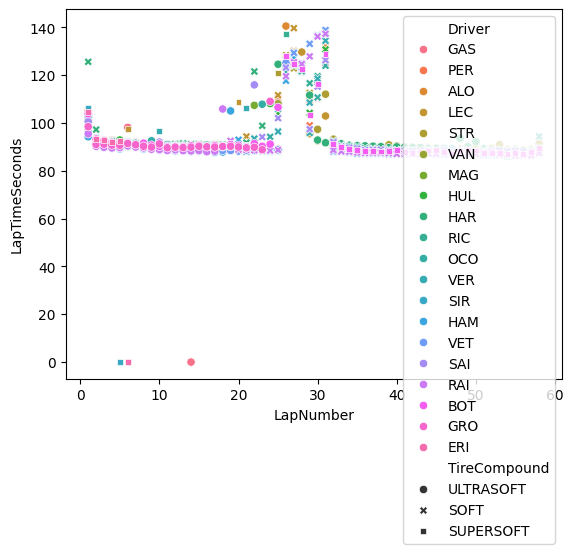

In [53]:
import seaborn as sns

# Assuming 'TireType' is the column with the tire information
sns.scatterplot(data=data_cleaned_with_weather, 
                y='LapTimeSeconds', 
                x='LapNumber', 
                hue='Driver', 
                style='TireCompound') 